<img width="350" style="float:right" 
     src="https://cdn.i.haymarketmedia.asia/?n=campaign-asia%2Fcontent%2FcroppedF1logo.png&h=570&w=855&q=100&v=20170226&c=1" />

# Formula 1 Analysis Group F

Enrique Recke\
Pieter Van Poecke\
Nitya Biyani\
Mar√≠a Aguilera Garc√≠a\
Cinthia Panayotti\
Juan Francisco Espinosa\
Felipe Restrepo

<a id='0'></a>
## Description
<p>
<div>The goal for this lab is to find relevant answers for these business questions:</div>
<ul>    
    <li>Which are the places with most user's interactions in order to propose a new race location?</li>
    <li>Which are the most common drivers and teams in certain locations to be able to plan more accurate marketing campaigns.

<a id='1'></a>
## 1. PySpark environment setup

To setup our PySpark environment we:
1. Search for Spark Installation
2. Create SparkSession

<a id='1.1'></a>
### 1.1 Search for Spark Installation 
This step is required just because we are working in the course environment.

In [1]:
import findspark
findspark.init()

We change pandas max column width property in order to improve data displaying.

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

<a id='1.2'></a>
### 1.2 Create SparkSession

By setting this environment variable we can include extra libraries in our Spark cluster

In [3]:
# To access catalogue in Hive
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

The first thing always is to create the SparkSession

In [4]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Twitter Analytics - DataFrames")
    .config("spark.sql.warehouse.dir","hdfs://localhost:9000/warehouse")
    .config("spark.sql.legacy.timeParserPolicy","LEGACY")
    .enableHiveSupport()
    .getOrCreate())

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


<a id='2'></a>
## 2. Data source and Spark data abstraction (DataFrame) setup


- In order to get an overview of the industry, we imported 5 csv files from Kaggle with historical F1 records from 1950 to July 2021.
- Specifically, we download the following files:
    1. Teams (constructors)
    2. Races
    3. Results
    4. Drivers
    5. Circuits

*Link*: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020?select=races.csv

We choose to infer the schema of the datasets as there is too many columns and datasets.

In [5]:
circuitsDF = spark.read.option("inferSchema", "true")\
                    .option("header", "true")\
                    .csv("1.FormulaOne_Lab/F1_HistoricalData/circuits.csv")\
                    .cache() #optimization to make processing faster

teamsDF = spark.read.option("inferSchema", "true")\
                    .option("header", "true")\
                    .csv("1.FormulaOne_Lab/F1_HistoricalData/constructors.csv")\
                    .cache()\

racesDF = spark.read.option("inferSchema", "true")\
                    .option("header", "true")\
                    .csv("1.FormulaOne_Lab/F1_HistoricalData/races.csv")\
                    .cache()

resultsDF = spark.read.option("inferSchema", "true")\
                    .option("header", "true")\
                    .csv("1.FormulaOne_Lab/F1_HistoricalData/results.csv")\
                    .cache()

driversDF = spark.read.option("inferSchema", "true")\
                .option("header", "true")\
                .csv("1.FormulaOne_Lab/F1_HistoricalData/drivers.csv")\
                .cache()

<a id='3'></a>
## 3. Data sets Meta Analysis

<a id='3.1'></a>
## 3.1 Circuits Data Set

Circuits where F1 races are held.

In [6]:
from IPython.display import display, Markdown
circuitsDF.printSchema()
display(Markdown("This Circuits DataFrame has **%d rows**." % circuitsDF.count()))

root
 |-- circuitId: integer (nullable = true)
 |-- circuitRef: string (nullable = true)
 |-- name: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- alt: integer (nullable = true)
 |-- url: string (nullable = true)



This Circuits DataFrame has **77 rows**.

<a id='3.2'></a>
## 3.2  Teams (constructors)  Data Set

Constructors in F1

In [7]:
teamsDF.printSchema()
display(Markdown("This Teams Results DataFrame has **%d rows**." % teamsDF.count()))

root
 |-- constructorId: integer (nullable = true)
 |-- constructorRef: string (nullable = true)
 |-- name: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- url: string (nullable = true)



This Teams Results DataFrame has **211 rows**.

<a id='3.3'></a>
## 3.3  Drivers Data Set

Drivers in F1.

In [8]:
driversDF.printSchema()
display(Markdown("This Teams Results DataFrame has **%d rows**." % driversDF.count()))

root
 |-- driverId: integer (nullable = true)
 |-- driverRef: string (nullable = true)
 |-- number: string (nullable = true)
 |-- code: string (nullable = true)
 |-- forename: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- url: string (nullable = true)



This Teams Results DataFrame has **853 rows**.

<a id='3.4'></a>
## 3.4 Races Data Set

Races in F1.

In [9]:
racesDF.printSchema()
display(Markdown("This Teams Results DataFrame has **%d rows**." % racesDF.count()))

root
 |-- raceId: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- round: integer (nullable = true)
 |-- circuitId: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- date: string (nullable = true)
 |-- time: string (nullable = true)
 |-- url: string (nullable = true)



This Teams Results DataFrame has **1058 rows**.

<a id='3.5'></a>
## 3.5  Results Data Set

Results of F1 Races.

In [10]:
resultsDF.printSchema()
display(Markdown("This Teams Results DataFrame has **%d rows**." % resultsDF.count()))

root
 |-- resultId: integer (nullable = true)
 |-- raceId: integer (nullable = true)
 |-- driverId: integer (nullable = true)
 |-- constructorId: integer (nullable = true)
 |-- number: string (nullable = true)
 |-- grid: integer (nullable = true)
 |-- position: string (nullable = true)
 |-- positionText: string (nullable = true)
 |-- positionOrder: integer (nullable = true)
 |-- points: double (nullable = true)
 |-- laps: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- milliseconds: string (nullable = true)
 |-- fastestLap: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- fastestLapTime: string (nullable = true)
 |-- fastestLapSpeed: string (nullable = true)
 |-- statusId: integer (nullable = true)



This Teams Results DataFrame has **25140 rows**.

Here we are importing all the libraries for the further analysis.

In [11]:
from pyspark.sql.types import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

<a id='4'></a>
# 4. Kaggle Dataset Analysis 

(From 1950 to July 2021)


## 4.1  How has the number of races changed over the years?

In [12]:
racesDF.toPandas().head(5)

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                      url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_Grand_Prix  
1  09:00:00   http://en.wikipedia.org/wiki/2009_Malaysian_Grand_Prix  
2  07:00:00     http://en.wikipedia.org/wiki/2009_Chinese_Grand_Prix  
3  12:00:00     http://en.wikipedia.org/wiki/2009_Bahrain_Grand_Prix  
4  12:00:00     http://en.wikipedia.org/wiki/2009_Spanish_Grand_Prix

In [13]:
numberRaces = racesDF[['raceId','year']]\
            .groupby('year')\
            .agg(F.count("*")\
            .alias("races"))\
            .sort(F.col('year').asc()).toPandas()
numberRaces

year  races
0   1950      7
1   1951      8
2   1952      8
3   1953      9
4   1954      9
..   ...    ...
67  2017     20
68  2018     21
69  2019     21
70  2020     17
71  2021     23

[72 rows x 2 columns]

Text(0, 0.5, '# of Races')

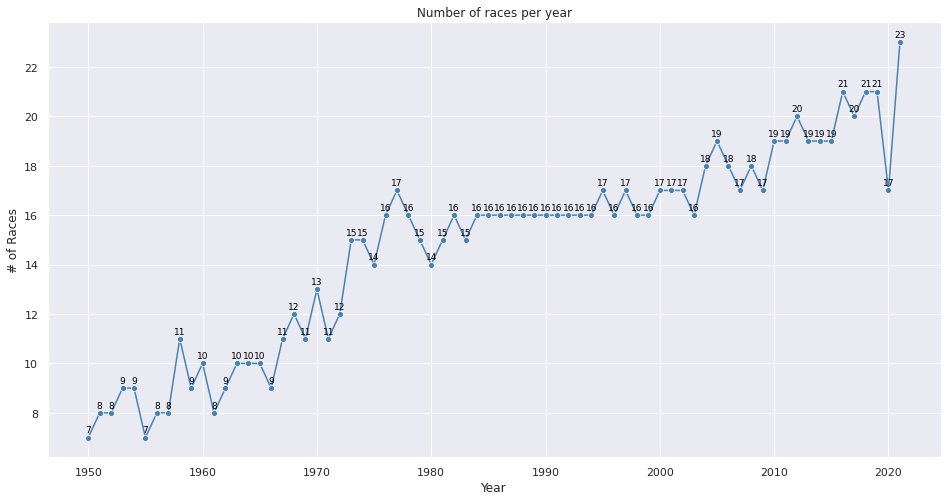

In [14]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
sns.lineplot(x="year", y="races", data=numberRaces, color="steelblue", marker="o")
# adding chart title
plt.title('Number of races per year')

# adding labels on bar chart
for index, row in numberRaces.iterrows():
    plt.text(row.year, row.races + 0.2, row.races, color='black', ha="center", size=9)
    
# adding custom labels for axes
plt.xlabel("Year")
plt.ylabel("# of Races")

<a id='4.2'></a>
## 4.2 Top 5 Winning Teams

Here we are joining the teams data set and teams results data sets to get the teams with more points (1950 -July 2021).

In [15]:
team_resultsDF = resultsDF.join(teamsDF,teamsDF.constructorId==resultsDF.constructorId)\
                         .cache()

most_winning_teamsDF = team_resultsDF\
                    .groupBy("name")\
                    .agg(F.sum("points").alias("totalPoints"))\
                    .sort(F.col("totalPoints").desc())\
                    .toPandas().head(5)
most_winning_teamsDF

name  totalPoints
0   Ferrari      9414.77
1  Mercedes      6066.14
2   McLaren      5864.50
3  Red Bull      5329.50
4  Williams      3567.00

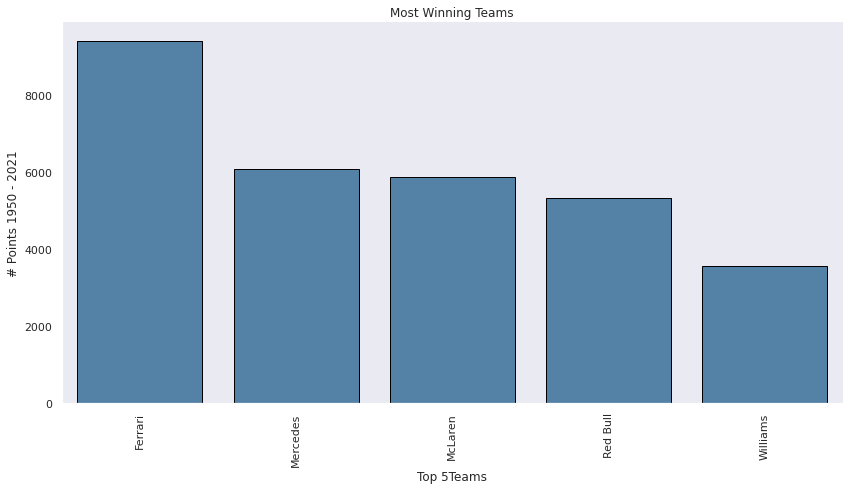

In [16]:
top_n = 5

plt.figure(figsize=(14, 7))
sns.set(style="dark")
sns.barplot(x="name", y="totalPoints", data=most_winning_teamsDF[:top_n], color="steelblue", edgecolor="black")

# adding chart title
plt.title('Most Winning Teams')


# adding custom labels for axes
plt.xlabel("Top " + str(top_n) + "Teams")
plt.ylabel("# Points 1950 - 2021")


# rotating axis labels
plt.xticks(rotation=90)

sns.despine()

<a id='4.3'></a>
## 4.3 Top 20 Winning Drivers

- We are adding the age column to the drivers table and then joining with the results table to get the drivers with more races won.

In [17]:
driversDF = driversDF.withColumn(("age"), F.round(F.datediff(F.col("current_date"),F.col("dob"))/365,0))
driversDF.show(5)

+--------+----------+------+----+--------+----------+----------+-----------+--------------------+----+
|driverId| driverRef|number|code|forename|   surname|       dob|nationality|                 url| age|
+--------+----------+------+----+--------+----------+----------+-----------+--------------------+----+
|       1|  hamilton|    44| HAM|   Lewis|  Hamilton|1985-01-07|    British|http://en.wikiped...|37.0|
|       2|  heidfeld|    \N| HEI|    Nick|  Heidfeld|1977-05-10|     German|http://en.wikiped...|45.0|
|       3|   rosberg|     6| ROS|    Nico|   Rosberg|1985-06-27|     German|http://en.wikiped...|36.0|
|       4|    alonso|    14| ALO|Fernando|    Alonso|1981-07-29|    Spanish|http://en.wikiped...|40.0|
|       5|kovalainen|    \N| KOV|  Heikki|Kovalainen|1981-10-19|    Finnish|http://en.wikiped...|40.0|
+--------+----------+------+----+--------+----------+----------+-----------+--------------------+----+
only showing top 5 rows



In [18]:
drivers_results = resultsDF.join(driversDF,resultsDF.driverId == driversDF.driverId)\
                        .where(resultsDF["position"] == 1)\
                        .groupBy("forename","surname","age")\
                        .agg(F.count("*").alias("racesWon"))\
                        .sort(F.col("racesWon").desc())\
                        .toPandas()
drivers_results.head(20)

forename     surname    age  racesWon
0       Lewis    Hamilton   37.0        98
1     Michael  Schumacher   53.0        91
2   Sebastian      Vettel   34.0        53
3       Alain       Prost   67.0        51
4      Ayrton       Senna   62.0        41
5    Fernando      Alonso   40.0        32
6       Nigel     Mansell   68.0        31
7      Jackie     Stewart   83.0        27
8        Niki       Lauda   73.0        25
9         Jim       Clark   86.0        25
10       Juan      Fangio  111.0        24
11     Nelson      Piquet   69.0        23
12       Nico     Rosberg   36.0        23
13      Damon        Hill   61.0        22
14       Kimi   R√§ikk√∂nen   42.0        21
15       Mika    H√§kkinen   53.0        20
16   Stirling        Moss   92.0        16
17     Jenson      Button   42.0        15
18        Max  Verstappen   24.0        15
19       Jack     Brabham   96.0        14

<a id='4.4'></a>
## 4.4 Number of Races per Country

- Here we are joining races and circuits tables to find the Top 10 countries that have hosted the most races.

In [19]:
number_of_races_per_countriesDF = racesDF.join(circuitsDF, racesDF.circuitId == circuitsDF.circuitId)\
                                .groupBy("country")\
                                .agg(F.count("*").alias("numRacesPerCountry"))\
                                .sort(F.col("numRacesPerCountry").desc())\
                                .limit(15)\
                                .toPandas()
number_of_races_per_countriesDF

country  numRacesPerCountry
0         Italy                 102
1       Germany                  79
2            UK                  76
3           USA                  71
4        Monaco                  67
5       Belgium                  66
6        France                  62
7         Spain                  58
8        Canada                  50
9        Brazil                  48
10        Japan                  38
11      Austria                  36
12      Hungary                  36
13    Australia                  36
14  Netherlands                  31

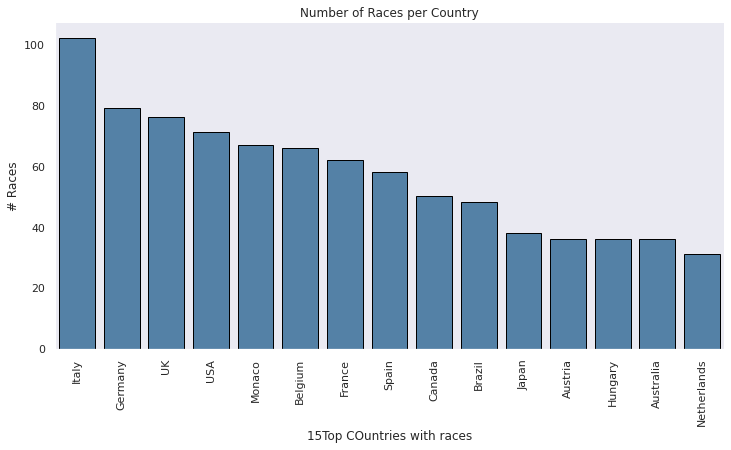

In [20]:
top_n = 15

plt.figure(figsize=(12, 6))
sns.set(style="dark")
sns.barplot(x="country", y="numRacesPerCountry", data=number_of_races_per_countriesDF[:top_n], color="steelblue", edgecolor="black")

# adding chart title
plt.title('Number of Races per Country')

# adding custom labels for axes
plt.xlabel(str(top_n) + "Top COuntries with races")
plt.ylabel("# Races")

# rotating axis labels
plt.xticks(rotation=90)

sns.despine()

<a id='4.5'></a>
## 4.5 Number of Races per City
- Here we are joining races and circuits tables to find the Top 10 cities that have hosted the most races.

In [21]:
number_of_races_per_citiesDF = racesDF.join(circuitsDF, racesDF.circuitId == circuitsDF.circuitId)\
                            .groupBy("location")\
                            .agg(F.count("*").alias("numRacesPerCity"))\
                            .sort(F.col("numRacesPerCity").desc())\
                            .limit(15)\
                            .toPandas()

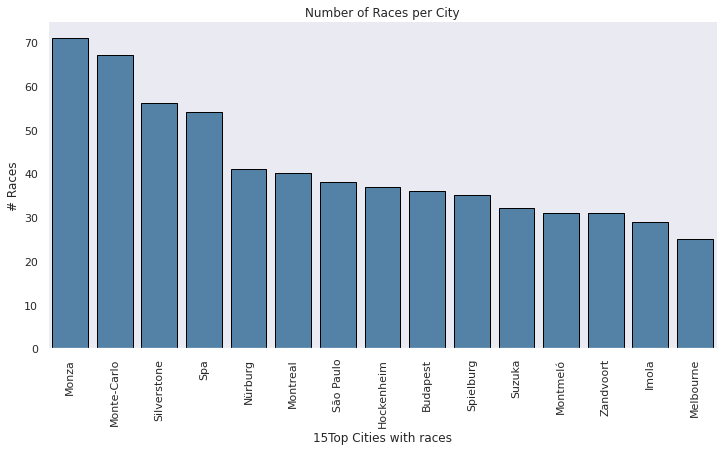

In [22]:
top_n = 15

plt.figure(figsize=(12, 6))
sns.set(style="dark")
sns.barplot(x="location", y="numRacesPerCity", data=number_of_races_per_citiesDF[:top_n], color="steelblue", edgecolor="black")

# adding chart title
plt.title('Number of Races per City')

# adding custom labels for axes
plt.xlabel(str(top_n) + "Top Cities with races")
plt.ylabel("# Races")

# rotating axis labels
plt.xticks(rotation=90)

sns.despine()

# 5. Tweets Analysis

<a id='5.1'></a>
## 5.1 Check Twitter Files

We checked if our ingested data was saved properly in the following HDFS directory: 

`hdfs://localhost:9000//datalake/raw/f1/tweets/*/*/*/*`

Notice that we use `*` since we have stored the data using a date structure of `year/month/day/files`.

Tweet Object Model: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

<a id='5.2'></a>
## 5.2 Create the DataFrame

Here we are creating the DataFrames with the stored tweets in order to do some metadata and data inspection to answer the business questions.

In [23]:
tweets = (spark.read
               .json("hdfs://localhost:9000//datalake/raw/f1/tweets/*/*/*/*"))
tweets.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- additional_media_info: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- embeddable: boolean (nullable = true)
 |    |    |    |    |-- monetizable: bo

In [24]:
# tweets.first()

<a id='5.3'></a>
## 5.3 Getting an Overview of the Tweets

**Total number of tweets**<br/>


In [25]:
tweets.count()

413042

**Total number of distinct users**<br/>

In [26]:
tweets.select("user.id").distinct().count()

205045

**Total number of users with geolocation enabled**<br/>

In [27]:
tweets.where("user.geo_enabled=true").select("user.id").distinct().count()

92358

**Total number of tweets per language**<br/>

- Here we found that almost all of the tweets were written in english.

In [28]:
tweets.select("lang").distinct().count()

51

<AxesSubplot:ylabel='lang'>

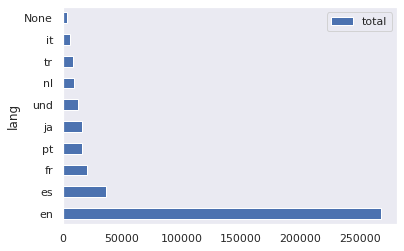

In [29]:
df_lang = (tweets
      .groupBy("lang")
      .agg(F.count("*").alias("total"))
      .orderBy(F.desc("total")))
      
df_lang.toPandas().head(10).plot.barh(x = 'lang', y = 'total')

- Here we were just verifying that the text language matches with the labeled language.

In [30]:
tweets_lang = tweets.select('lang','text')
tweets_lang.toPandas().head(10)

lang  \
0   es   
1   en   
2   en   
3   en   
4   en   
5   en   
6   en   
7   tr   
8   en   
9   en   

                                                                                                                                             text  
0    RT @marca: üëèüëèüëè ¬°¬°Un adelantamiento para la historia de la #F1!! As√≠ pas√≥ Verstappen a Hamilton en la √∫ltima vuelta del #AbuDhabiGP  https:/‚Ä¶  
1                                   RT @F1: RED BULL: "MAX VERSTAPPEN - YOU ARE WORLD CHAMPION!" üéßüèÜ\n\n#AbuDhabiGP üá¶üá™ #F1 https://t.co/4oAei8sPR8  
2                                                           RT @SunRisers: #OrangeArmy = best fans in the world üß°ü§©\n\n#F1 https://t.co/ebDpTiaJPL  
3                               RT @redbullracing: 2018 üèÜ 2019 üèÜ 2020 üèÜ 2021 üèÜ Four-time Fastest Pit Stop champions üîß #F1 https://t.co/53qGnNHTAe  
4    RT @Jamesallenonf1: Do you think #F1 team bosses should be able to lobby the @fia Race Director on radio during the race? Like for Yes - RT‚Ä¶  
5           YES YES YES YEAAAAASSSS MAX VERSTAPPEN WORLD CHAMPION FORMULA 1! WELL DESERVED! WHAT A END! UNREAL! #max #F1‚Ä¶ https://t.co/k8lAoAEV8n  
6                                                                                                                                 Thank you!! #F1  
7         RT @kachikitataka: FIA'sƒ±, Masi'si, Hamilton'ƒ±, Toto'su derken herkesi √ºst √ºste koyup g√ºmletti, adamsƒ±n #Verstappen\n#F1 #AbuDhabiGP üá¶üá™  
8  RT @F1: Congratulations @MercedesAMGF1, 2021 Constructors' Champions\n\nDisappointment in a phenomenal battle for the drivers' crown, but the‚Ä¶  
9  RT @F1: Respect all round on the podium after an epic title race that will be remembered forever üèÜ\n\n#AbuDhabiGP üá¶üá™ #F1 @Max33Verstappen @Le‚Ä¶

**Top 10 user locations**<br/>

- Here we tried to find out user location for each tweet but since there are many accounts that disabled geo_location, we filtered out the empty locations to view only those with a location assigned. 

In [31]:
df_None = (tweets
          .groupBy("user.location")
          .agg(F.count("*").alias("tweets"))
          .orderBy(F.desc("tweets")))

df_None.toPandas().head(1)

location  tweets
0     None  139531

- Here we found that UK was the location with more F1 tweets followed by Mexico.

In [32]:
df_location = (tweets
          .where(tweets.user.location != "")
          .groupBy("user.location")
          .agg(F.count("*").alias("tweets"))
          .orderBy(F.desc("tweets")))

df_location.toPandas().head(10)

location  tweets
0          London, England    2938
1           United Kingdom    2058
2                   M√©xico    1763
3  England, United Kingdom    1588
4                   Brasil    1532
5                   France    1530
6            Paris, France    1313
7                   London    1280
8        ƒ∞stanbul, T√ºrkiye    1218
9             South Africa    1134

**Top 15 users with more mentions**<br/>

We can see that, for obvious reasons, the user with more mentions is Max Verstappen, who was the 2021 World Champion this last sunday, december 12th.

<AxesSubplot:title={'center':'Mentions per User'}, ylabel='user'>

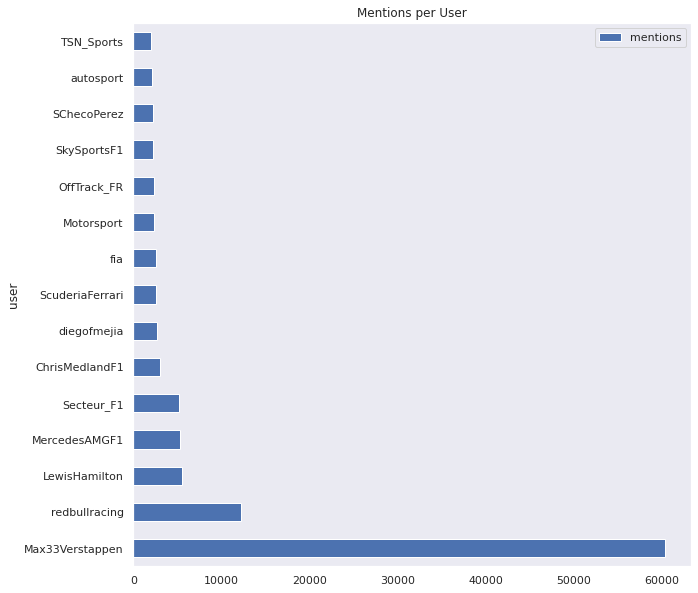

In [33]:
df_users_with_more_mentions = (tweets
          .select(F.explode("entities.user_mentions.screen_name").alias("user"))
          .where((F.lower('user') != 'f1'))
          .groupBy("user")
          .agg(F.count("*").alias("mentions"))
          .orderBy(F.desc("mentions"))
          .limit(15))
df_users_with_more_mentions.toPandas().plot.barh(x = 'user', y = 'mentions', title = 'Mentions per User', figsize=(10,10))

As **UK** was the location with more interactions, we wanted to find which were the user account that people mentioned the most.
Here, Lewis Hamilton is one the most mentioned drivers.

<AxesSubplot:title={'center':'Mentions per User'}, ylabel='user'>

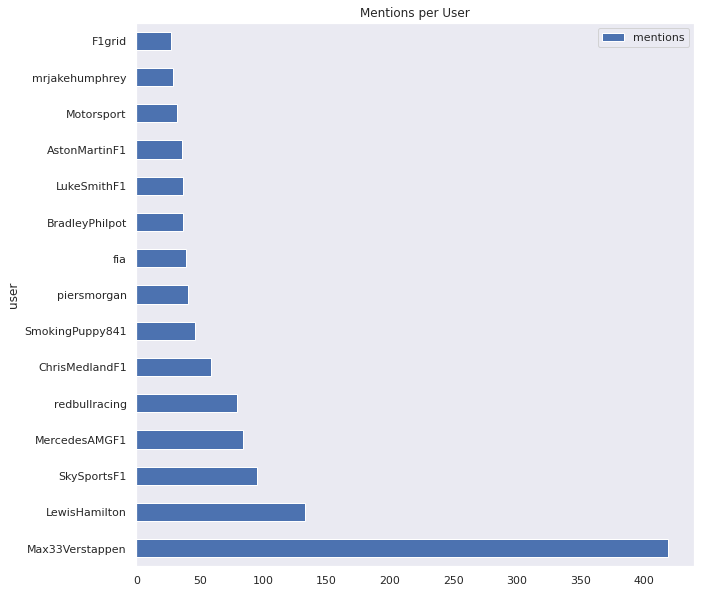

In [34]:
df_UK = (tweets
          .select(F.explode("entities.user_mentions.screen_name").alias("user"))
          .where((F.lower('user') != 'f1') & ((tweets.user.location == "London, England") | (tweets.user.location == "United Kingdom")))
          .groupBy("user")
          .agg(F.count("*").alias("mentions"))
          .orderBy(F.desc("mentions"))
          .limit(15))
df_UK.toPandas().plot.barh(x = 'user', y = 'mentions', title = 'Mentions per User', figsize=(10,10))

We wanted to do the same but with Mexico. We found that, in order to take advantage of his image and popularity in this country, F1 and Red Bull Team should take advantage of Checo Perez to promote their events.

<AxesSubplot:title={'center':'Mentions per User'}, ylabel='user'>

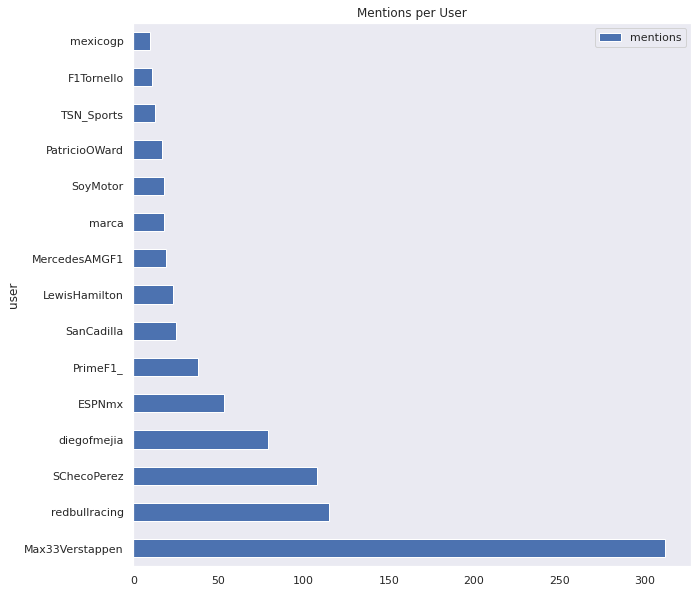

In [35]:
df_Mexico = (tweets
          .select(F.explode("entities.user_mentions.screen_name").alias("user"))
          .where((F.lower('user') != 'f1') & (tweets.user.location == "M√©xico"))
          .groupBy("user")
          .agg(F.count("*").alias("mentions"))
          .orderBy(F.desc("mentions"))
          .limit(15))
df_Mexico.toPandas().plot.barh(x = 'user', y = 'mentions', title = 'Mentions per User', figsize=(10,10))

## Tweets per day

We wanted to count the number of tweets per day. The final race was obviusly the day with more number of tweets collected.

*There were also a significant number of tweets with `None` location* 

In [36]:
tweets.select((F.split('created_at', " ")[2]).alias('Day'))\
                .groupBy('Day')\
                .agg(F.count("*").alias("total"))\
                .orderBy(F.asc("Day"))\
                .toPandas()

Day   total
0  None    3657
1    05     807
2    06    1048
3    07    1434
4    08    1013
5    09    2262
6    10    5953
7    11   11838
8    12  385030

**Top 10 more popular hashtags**<br/>

- We wanted to filter out the **#F1** and **#Formula1** hashtags, since all the tweets we stored used these hashtags.

In [37]:
df = (tweets
      .select(F.explode("entities.hashtags.text").alias("hashtag"))
      .where((F.lower('hashtag') != 'f1') & (F.lower('hashtag') != 'formula1'))
      .groupBy(F.lower("hashtag"))
      .agg(F.count("*").alias("total"))
      .orderBy(F.desc("total"))
      .limit(10))
      
df.toPandas()

lower(hashtag)   total
0     abudhabigp  147737
1    historymade   38908
2     abudabhigp    8947
3           f1jp    8614
4   simplylovely    7770
5       f1finale    5793
6     verstappen    4001
7        redbull    3739
8       f1„Ç¢„Éñ„ÉÄ„Éìgp    3383
9  maxverstappen    3126

As with the user accounts, here we wanted to go deeper and look for the most relevant hashtags for the users in Mexico...

In [38]:
df_Hashtags_Mexico = (tweets
      .select(F.explode("entities.hashtags.text").alias("hashtag"))
      .where((F.lower('hashtag') != 'f1') & (F.lower('hashtag') != 'formula1') & (tweets.user.location == "M√©xico"))
      .groupBy(F.lower("hashtag"))
      .agg(F.count("*").alias("total"))
      .orderBy(F.desc("total"))
      .limit(10))
      
df_Hashtags_Mexico.toPandas()

lower(hashtag)  total
0     abudhabigp    661
1    historymade    168
2   simplylovely     49
3     verstappen     23
4     checoperez     21
5       hamilton     20
6          checo     20
7        redbull     19
8     abudabhigp     16
9       f1finale     16